In [1]:
import numpy as np
import xarray as xr
import geopandas as gpd

import shapely.geometry as sg

import cartopy.feature as cfeature
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [5]:
lon_min, lat_min, lon_max, lat_max = 6.6, 43.5, 8, 45

region_area = sg.Polygon([
            (lon_min, lat_min),
            (lon_max, lat_min),
            (lon_max, lat_max),
            (lon_min, lat_max),
            (lon_min, lat_min)
                            ])
rect_area = gpd.GeoDataFrame(geometry=[region_area], crs="EPSG:4326")

In [6]:
DATA = xr.open_dataset('/media/arturo/T9/Data/Italy/Satellite/GSMaP/1dy/GSMaP_Italy_1dy_2002_01_01_2024_12_31.nc')
lon2d, lat2d = np.meshgrid(DATA.lon, DATA.lat)
PRE_mean = np.nansum(DATA.PRE.values,axis=0)

<GeoAxes: >

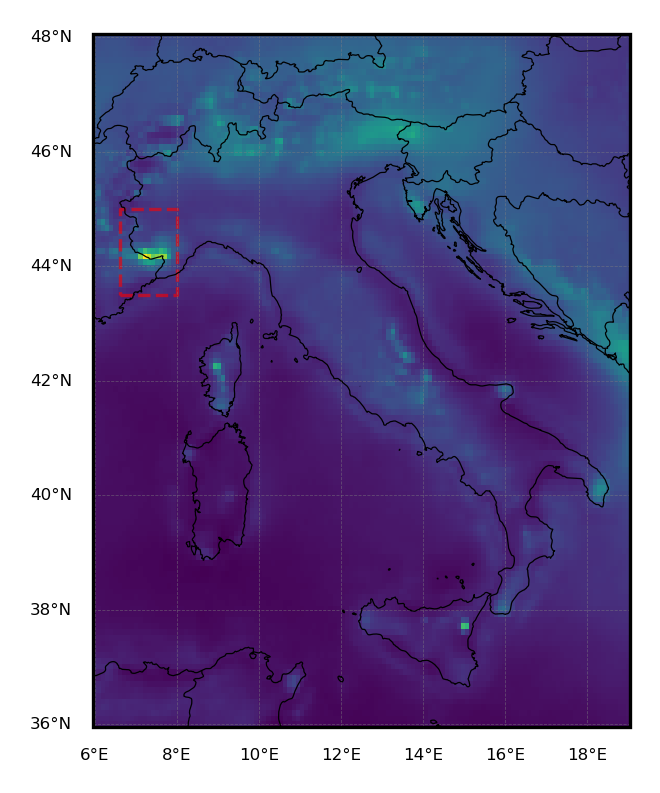

In [7]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.pcolormesh(lon2d, lat2d, PRE_mean)

rect_area.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1, alpha=0.6)